In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit

In [19]:
A = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/A/train_targets.parquet')
B = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/B/train_targets.parquet')
C = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/C/train_targets.parquet')

A.head()

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36


In [20]:
# Merging data from A, B, and C on the 'time' column
combined_df = A.merge(B, on='time', suffixes=('_A', '_B')).merge(C, on='time')
combined_df.rename(columns={'pv_measurement_A': 'pv_measurement_A',
                            'pv_measurement_B': 'pv_measurement_B',
                            'pv_measurement': 'pv_measurement_C'}, inplace=True)


combined_df.tail()


,time,pv_measurement_A,pv_measurement_B,pv_measurement_C
28410,2023-04-30 19:00:00,9.02,0.828587,50.96
28411,2023-04-30 20:00:00,0.00,-0.000000,2.94
28412,2023-04-30 21:00:00,0.00,-0.000000,0.00
28413,2023-04-30 22:00:00,0.00,-0.000000,-0.00
28414,2023-04-30 23:00:00,0.00,-0.000000,-0.00


In [21]:
correlation_matrix = combined_df.corr()
correlation_matrix


,time,pv_measurement_A,pv_measurement_B,pv_measurement_C
time,1.000000,-0.053931,-0.107936,-0.052552
pv_measurement_A,-0.053931,1.000000,0.855331,0.911824
pv_measurement_B,-0.107936,0.855331,1.000000,0.872523
pv_measurement_C,-0.052552,0.911824,0.872523,1.000000


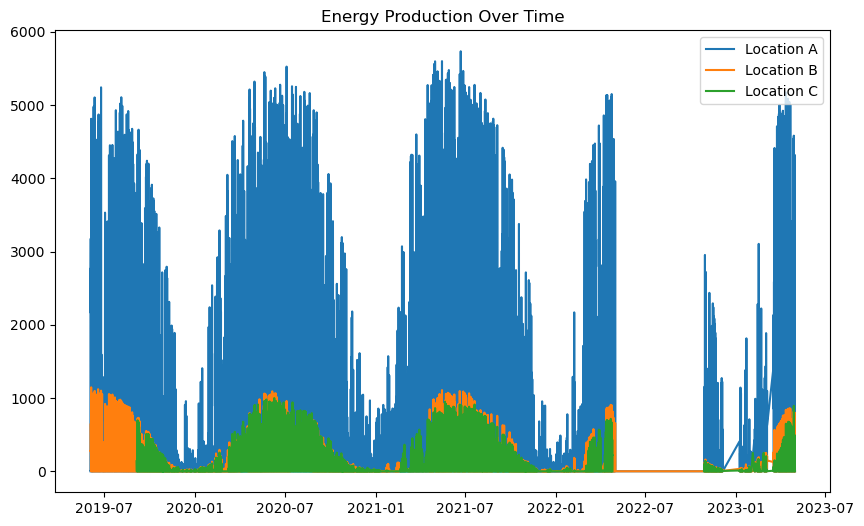

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(combined_df['time'], combined_df['pv_measurement_A'], label='Location A')
plt.plot(combined_df['time'], combined_df['pv_measurement_B'], label='Location B')
plt.plot(combined_df['time'], combined_df['pv_measurement_C'], label='Location C')
plt.legend()
plt.title('Energy Production Over Time')
plt.show()



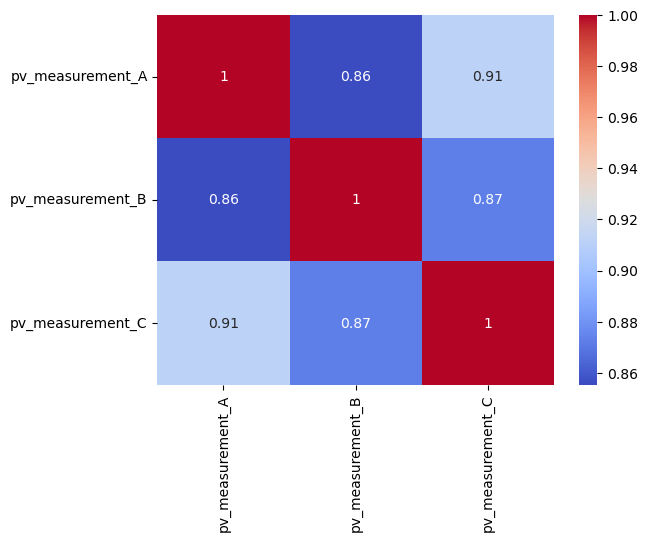

In [25]:
correlation_matrix = combined_df.drop('time', axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [26]:
# Assuming the combined_df has been created as shown in previous steps
no_gap_df = combined_df[(combined_df['time'] < '2022-10-28') | (combined_df['time'] > '2023-01-08')]
correlation_matrix = no_gap_df.drop('time', axis=1).corr()
print(correlation_matrix)


                  pv_measurement_A  pv_measurement_B  pv_measurement_C
pv_measurement_A          1.000000          0.855860          0.913164
pv_measurement_B          0.855860          1.000000          0.871773
pv_measurement_C          0.913164          0.871773          1.000000
